# Local thickness

You can use napari-toska to measure the local thickness of a skeletonized image. The local thickness is the diameter of the largest circle/sphere that can be inscribed at each point of the skeleton.

*Note*: This can become quite slow, especially for 3D images. Consider working one skeleton at a time.

In [1]:
from skimage import measure, data, draw
import napari_toska as nts
import numpy as np
import napari

In [2]:
viewer = napari.Viewer()

Assistant skips harvesting pyclesperanto as it's not installed.


In [3]:
labels = measure.label(data.binary_blobs(seed=0))

## Create an outline

In [4]:
labeled_skeletons = nts.generate_labeled_skeletonization(labels)
labeled_outline = nts.generate_labeled_outline(labels)
print('Number of skeletons: ', labeled_skeletons.max())

viewer.add_labels(labeled_outline)

Number of skeletons:  15


<Labels layer 'labeled_outline' at 0x21ccbfd4640>

## Measure local thickness

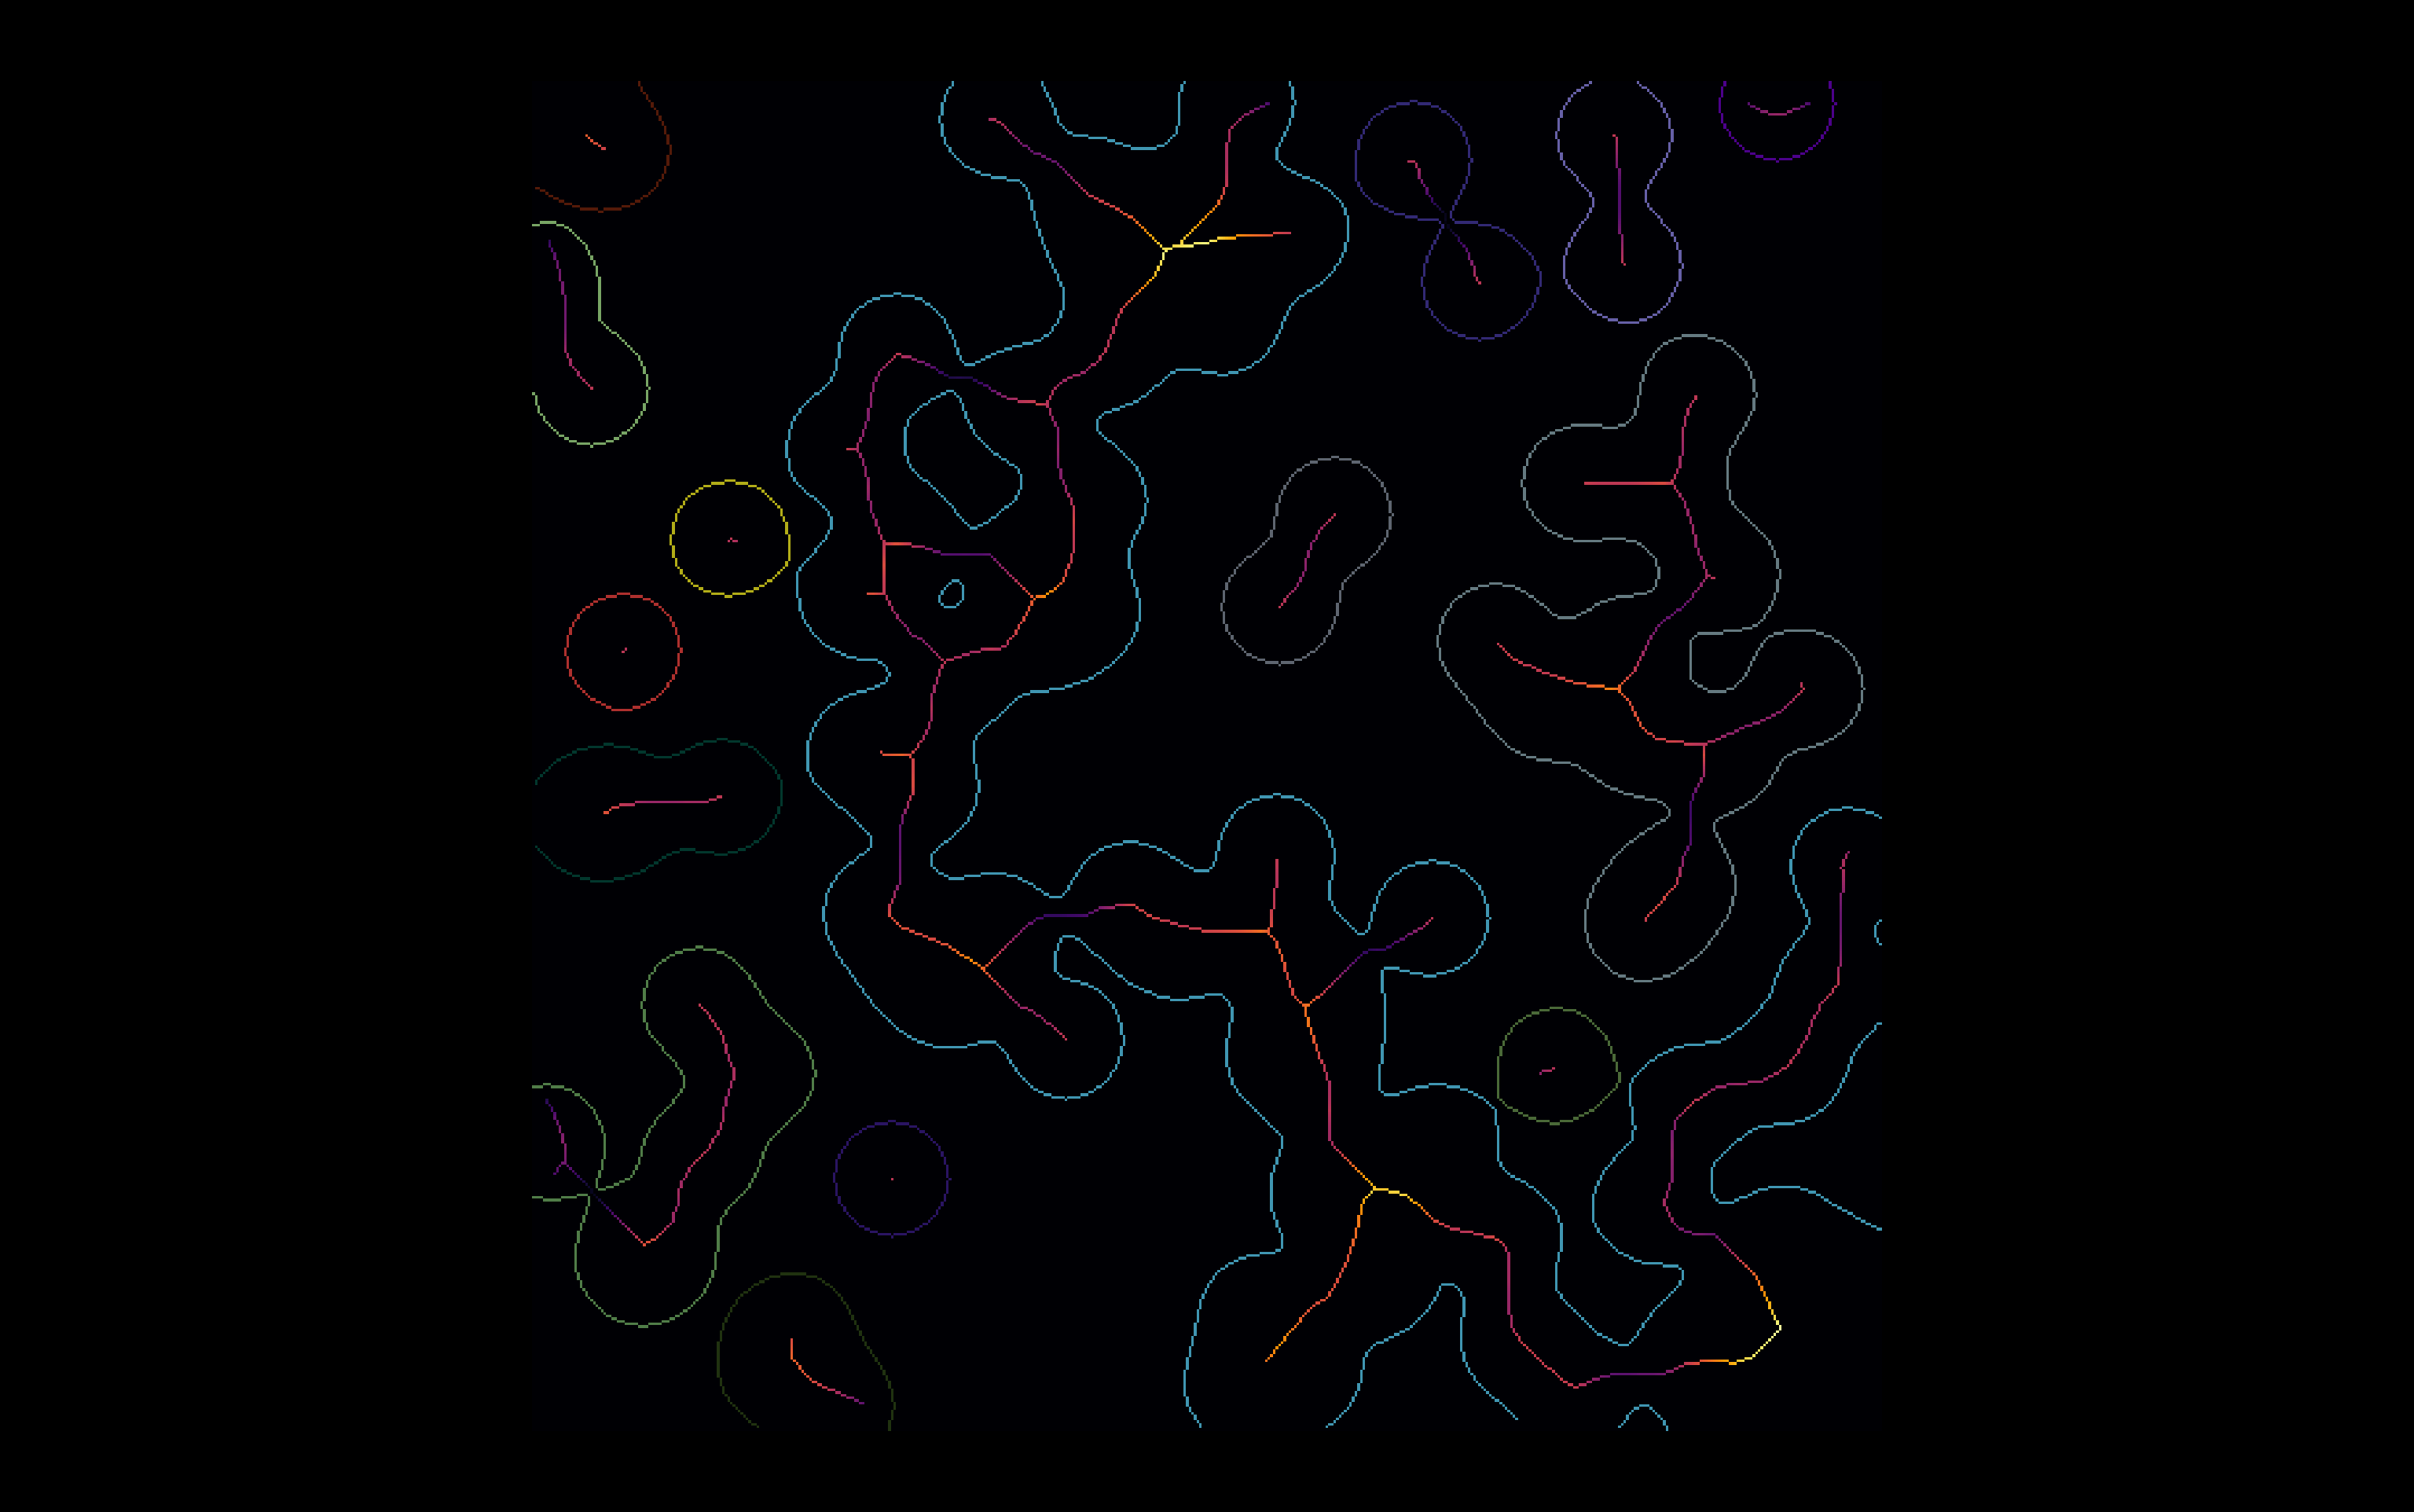

In [5]:
local_thickness = nts.generate_local_thickness_skeleton(labeled_outline, labeled_skeletons)
viewer.add_image(local_thickness, name='local_thickness', blending='additive', colormap='inferno')

napari.utils.nbscreenshot(viewer, canvas_only=True)

## Reconstruction

You can also (to a degree) reconstruct the original label image from the local thickness image. This is done by drawing a circle/sphere at each point of the skeleton with a radius equal to the local thickness at that point.

In [ ]:
reconstruction = nts.reconstruct_from_local_thickness(local_thickness)
viewer.add_labels(reconstruction, name='reconstruction', blending='additive')

napari.utils.nbscreenshot(viewer, canvas_only=True)